## Oral cancer prediction


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how a patient's oral health is affected by other variables such as tobacco, alcohol, HPV infection, betel quid use, and dietary factors.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/ankushpanday2/oral-cancer-prediction-dataset
- The data consists of 25 columns and 84922 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/data_set.csv')

#### Show Top 5 Records

In [9]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


#### Shape of the dataset

In [10]:
df.shape

(84922, 25)

### 2.2 Dataset information

- ID – Unique identifier
- Country – Country name
- Age – Age of the individual
- Gender – Male/Female
- Tobacco Use – Yes/No
- Alcohol Consumption – Yes/No
- HPV Infection – Yes/No
- Betel Quid Use – Yes/No
- Chronic Sun Exposure – Yes/No
- Poor Oral Hygiene – Yes/No
- Diet (Fruits & Vegetables Intake) – Low/Moderate/High
- Family History of Cancer – Yes/No
- Compromised Immune System – Yes/No
- Oral Lesions – Yes/No
- Unexplained Bleeding – Yes/No
- Difficulty Swallowing – Yes/No
- White or Red Patches in Mouth – Yes/No
- Tumor Size (cm) – Numerical value
- Cancer Stage – 0 (No Cancer), 1, 2, 3, 4
- Treatment Type – Surgery/Radiation/Chemotherapy/Targeted Therapy/No Treatment
- Survival Rate (5-Year, %)
- Cost of Treatment (USD)
- Economic Burden (Lost Workdays per Year)
- Early Diagnosis (Yes/No)
- Oral Cancer (Diagnosis) – Yes/No (Target Variable)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [11]:
df.isna().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [13]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

ID                                          84922
Country                                        17
Age                                            83
Gender                                          2
Tobacco Use                                     2
Alcohol Consumption                             2
HPV Infection                                   2
Betel Quid Use                                  2
Chronic Sun Exposure                            2
Poor Oral Hygiene                               2
Diet (Fruits & Vegetables Intake)               3
Family History of Cancer                        2
Compromised Immune System                       2
Oral Lesions                                    2
Unexplained Bleeding                            2
Difficulty Swallowing                           2
White or Red Patches in Mouth                   2
Tumor Size (cm)                             42350
Cancer Stage                                    5
Treatment Type                                  5


### 3.5 Check statistics of data set

In [15]:
df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


#### Insight
- The average age group of people in the data set is 55
- 75 percentile of the people have the survival rate of around 100 percent

### 3.7 Exploring Data

In [12]:
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [26]:
print("Categories in 'Country' variable:     ",end=" " )
print(df['Country'].unique())

print("Categories in 'Gender' variable:  ",end=" ")
print(df['Gender'].unique())

print("Categories in'Tobacco Use' variable:",end=" " )
print(df['Tobacco Use'].unique())

print("Categories in 'Alcohol Consumption' variable:     ",end=" " )
print(df['Alcohol Consumption'].unique())

print("Categories in 'Betel Quid Use' variable:     ",end=" " )
print(df['Betel Quid Use'].unique())

print("Categories in 'HPV Infection' variable:     ",end=" " )
print(df['HPV Infection'].unique())


print("Categories in 'Chronic Sun Exposure' variable:     ",end=" " )
print(df['Chronic Sun Exposure'].unique())

print("Categories in'Poor Oral Hygiene' variable:",end=" " )
print(df['Poor Oral Hygiene'].unique())

print("Categories in 'Diet (Fruits & Vegetables Intake)' variable:     ",end=" " )
print(df['Diet (Fruits & Vegetables Intake)'].unique())

print("Categories in 'Family History of Cancer' variable:     ",end=" " )
print(df['Family History of Cancer'].unique())

print("Categories in 'Compromised Immune System' variable:     ",end=" " )
print(df['Compromised Immune System'].unique())


print("Categories in 'Oral Lesions' variable:     ",end=" " )
print(df['Oral Lesions'].unique())


print("Categories in 'Unexplained Bleeding' variable:     ",end=" " )
print(df['Unexplained Bleeding'].unique())

print("Categories in 'Difficulty Swallowing' variable:     ",end=" " )
print(df['Difficulty Swallowing'].unique())

print("Categories in 'White or Red Patches in Mouth ' variable:     ",end=" " )
print(df['White or Red Patches in Mouth'].unique())


print("Categories in 'Treatment Type' variable:     ",end=" " )
print(df['Treatment Type'].unique())

print("Categories in 'Early Diagnosis  ' variable:     ",end=" " )
print(df['Early Diagnosis'].unique())

print("Categories in 'Oral Cancer (Diagnosis)  ' variable:     ",end=" " )
print(df['Oral Cancer (Diagnosis)'].unique())



Categories in 'Country' variable:      ['Italy' 'Japan' 'UK' 'Sri Lanka' 'South Africa' 'Taiwan' 'USA' 'Germany'
 'France' 'Australia' 'Brazil' 'Pakistan' 'Kenya' 'Russia' 'Nigeria'
 'Egypt' 'India']
Categories in 'Gender' variable:   ['Female' 'Male']
Categories in'Tobacco Use' variable: ['Yes' 'No']
Categories in 'Alcohol Consumption' variable:      ['Yes' 'No']
Categories in 'Betel Quid Use' variable:      ['No' 'Yes']
Categories in 'HPV Infection' variable:      ['Yes' 'No']
Categories in 'Chronic Sun Exposure' variable:      ['No' 'Yes']
Categories in'Poor Oral Hygiene' variable: ['Yes' 'No']
Categories in 'Diet (Fruits & Vegetables Intake)' variable:      ['Low' 'High' 'Moderate']
Categories in 'Family History of Cancer' variable:      ['No' 'Yes']
Categories in 'Compromised Immune System' variable:      ['No' 'Yes']
Categories in 'Oral Lesions' variable:      ['No' 'Yes']
Categories in 'Unexplained Bleeding' variable:      ['No' 'Yes']
Categories in 'Difficulty Swallowing' varia

In [27]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['ID', 'Age', 'Tumor Size (cm)', 'Cancer Stage', 'Survival Rate (5-Year, %)', 'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)']

We have 18 categorical features : ['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure', 'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)', 'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing', 'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis', 'Oral Cancer (Diagnosis)']


In [30]:
df.head(2)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.0,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.5,177,No,Yes


### 4. Exploring Data ( Visualization )
#### 4.1 Visualizations to make some conclusion. 

- Scatterplot
- Regression plot
- Box plot
- lineplot
- Heat Map
- Count plot
- Histogram using Kernel Distribution Function (KDE)

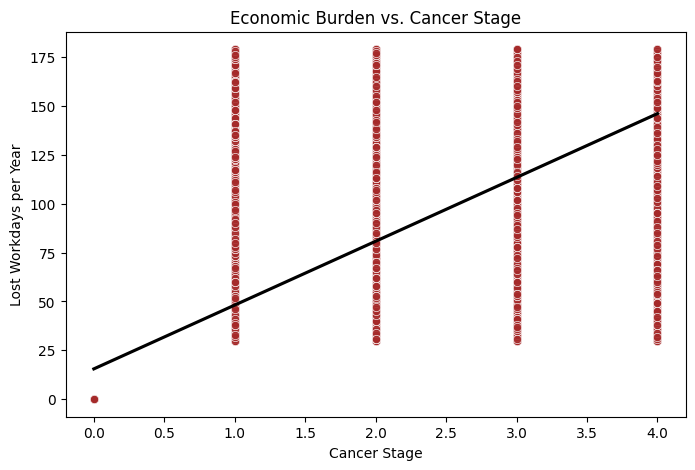

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Cancer Stage', y='Economic Burden (Lost Workdays per Year)', color='brown', alpha=0.9)
sns.regplot(data=df, x='Cancer Stage', y='Economic Burden (Lost Workdays per Year)', scatter=False, color='black')
plt.title('Economic Burden vs. Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Lost Workdays per Year')
plt.show()

#####  Insights
- Higher the cancer stage higher is the lost number of working days in an year for a patient

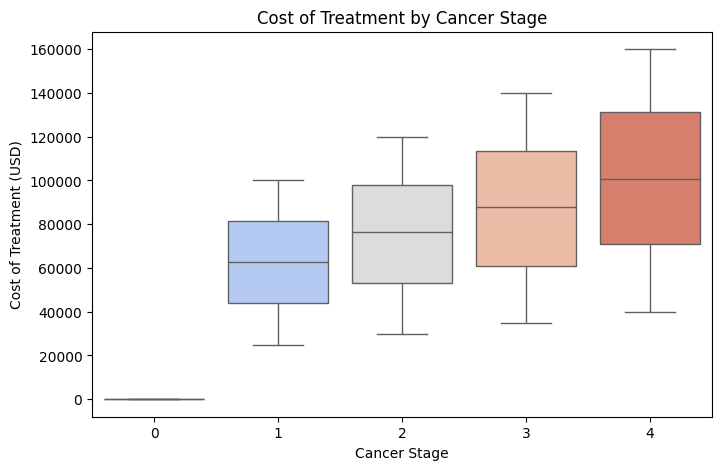

In [104]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cancer Stage', y='Cost of Treatment (USD)', palette='coolwarm')
plt.title('Cost of Treatment by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Cost of Treatment (USD)')
plt.show()

#####  Insights
- Higher the cancer stage higher is the pricing range of cost of treatment for a patient

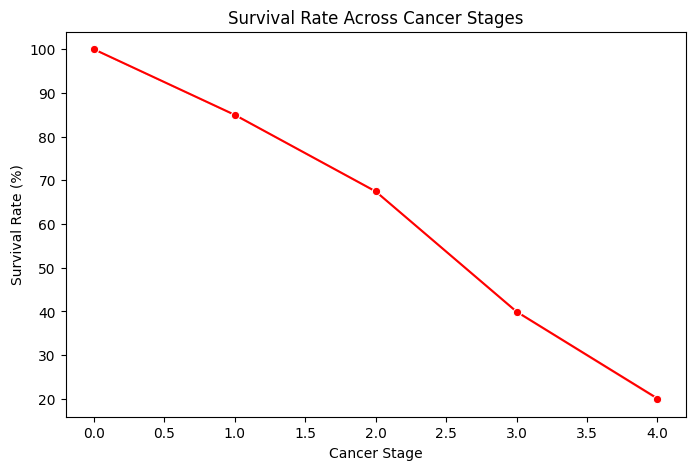

In [21]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Cancer Stage', y='Survival Rate (5-Year, %)', marker='o', color='red')
plt.title('Survival Rate Across Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Rate (%)')
plt.show()

#####  Insights
- Higher the cancer stage lower is the survival rate percentage of a patient based on the data of last 5 years.

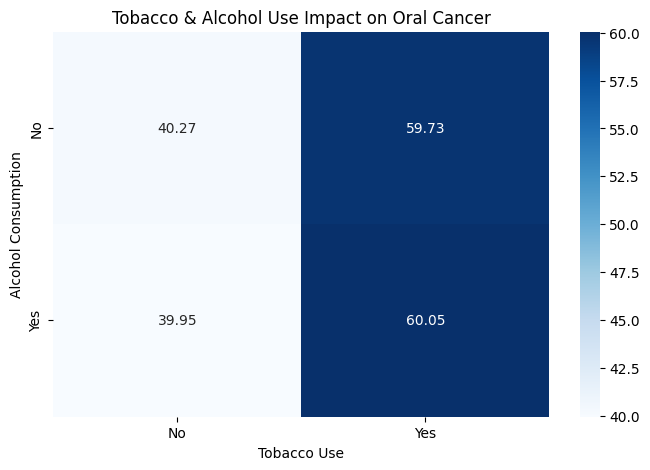

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(df['Tobacco Use'], df['Alcohol Consumption'], normalize='index') * 100, annot=True, cmap='Blues', fmt='.2f')
plt.title('Tobacco & Alcohol Use Impact on Oral Cancer')
plt.xlabel('Tobacco Use')
plt.ylabel('Alcohol Consumption')
plt.show()

#####  Insights
- 60% of the patients reported consume both tobacco and alcohol.
- More number of people consume tobacco(59.7%) compared with number of people who consume alcohol(40.0%), indicating consumption of tobacco has more potential impact on oral cancer than consumption of alcohol.


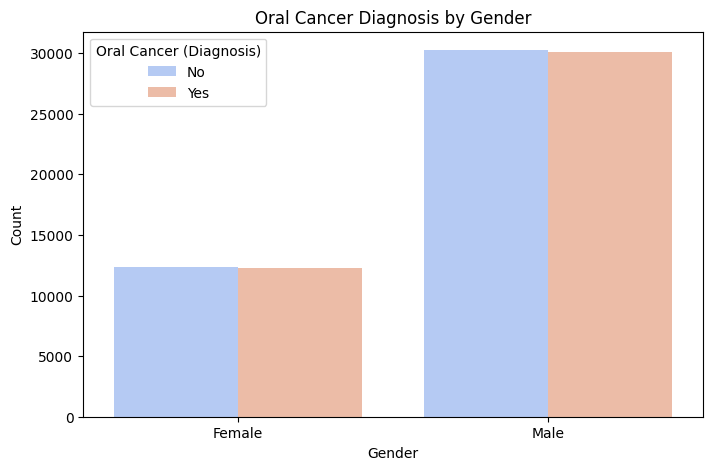

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Oral Cancer (Diagnosis)', palette='coolwarm')
plt.title('Oral Cancer Diagnosis by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

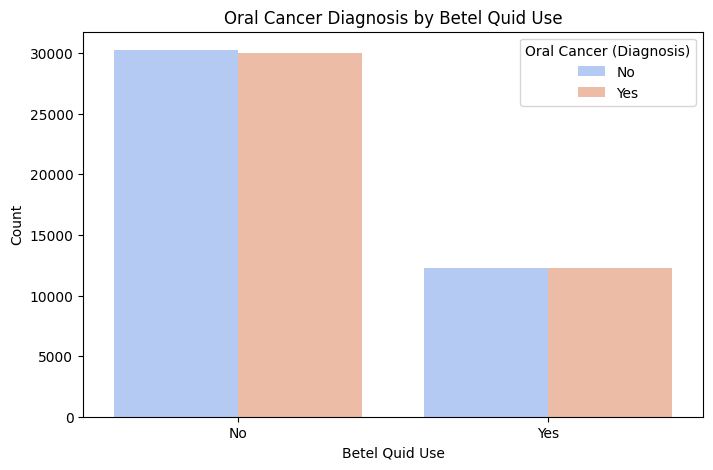

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Betel Quid Use', hue='Oral Cancer (Diagnosis)', palette='coolwarm')
plt.title('Oral Cancer Diagnosis by Betel Quid Use')
plt.xlabel('Betel Quid Use')
plt.ylabel('Count')
plt.show()

#####  Insights
- The number of people who use betel quid have almost 50% of chances to be diagnosed with Oral cancer.

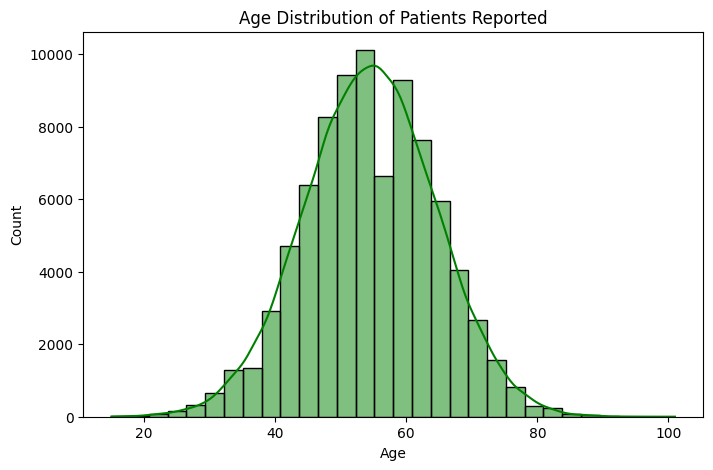

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='green')
plt.title('Age Distribution of Patients Reported')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#####  Insights
- Most number of patients are of the age group 40 - 65


### 5. Conclusions
- Oral cancer is related with tobacco use, alcohol consumption and betel quid use.
- There are more number of male patients than female.
- Survival rate drastically decreases after the cancer stage 2.
- Median cost of treatment drastically increases after the cancer stage 2.
